In [229]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = os.path.join(os.getcwd(), "exams_rus.xlsx")
data = pd.read_excel(file_path, index_col=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   №                              3048 non-null   float64
 1   № школы                        3048 non-null   float64
 2   Класс                          3048 non-null   object 
 3   Пол                            3048 non-null   object 
 4   Номер варианта                 3048 non-null   float64
 5   Задания с кратким ответом      3048 non-null   object 
 6   Задания с развёрнутым ответом  3048 non-null   object 
 7   Устная часть                   1 non-null      object 
 8   Первичный балл                 3048 non-null   float64
 9   Балл                           3049 non-null   float64
 10  Минимальный балл               3048 non-null   float64
dtypes: float64(6), object(5)
memory usage: 262.2+ KB


In [230]:
data = data.drop("Устная часть", axis=1)
data = data.drop(index=len(data) - 1, axis=0)
data

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Первичный балл,Балл,Минимальный балл
0,1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),8.0,20.0,24.0
1,2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),8.0,20.0,24.0
2,3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),9.0,22.0,24.0
3,4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),9.0,22.0,24.0
4,5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),10.0,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...
3043,3044.0,146.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),58.0,100.0,24.0
3044,3045.0,147.0,11,Ж,340.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),58.0,100.0,24.0
3045,3046.0,147.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),58.0,100.0,24.0
3046,3047.0,147.0,11,Ж,337.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),58.0,100.0,24.0


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   №                              3048 non-null   float64
 1   № школы                        3048 non-null   float64
 2   Класс                          3048 non-null   object 
 3   Пол                            3048 non-null   object 
 4   Номер варианта                 3048 non-null   float64
 5   Задания с кратким ответом      3048 non-null   object 
 6   Задания с развёрнутым ответом  3048 non-null   object 
 7   Первичный балл                 3048 non-null   float64
 8   Балл                           3048 non-null   float64
 9   Минимальный балл               3048 non-null   float64
dtypes: float64(6), object(4)
memory usage: 238.3+ KB


### Процент учащихся, выполнивших работу ниже среднего.

In [232]:
percent = len(data[data["Балл"] < data["Балл"].mean()]) / len(data) * 100 
print(f"{percent:.2f}%")

51.28%


### Процент учащихся не сдавших экзамен.

In [233]:
percent = len(data[data["Балл"] < data["Минимальный балл"]]) / len(data) * 100 
print(f"{percent:.2f}%")

0.13%


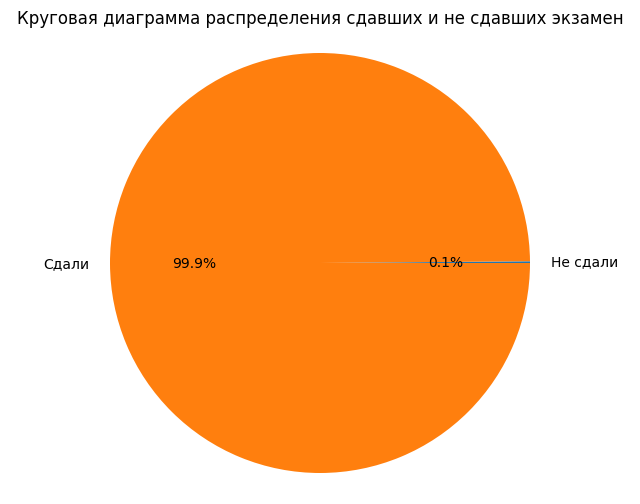

In [234]:
didnt_pass = len(data[data["Балл"] < data["Минимальный балл"]])
passed_the_exam = len(data) - didnt_pass

sizes = [didnt_pass, passed_the_exam]
labels = ["Не сдали","Сдали"]
# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Настройки
plt.title('Круговая диаграмма распределения сдавших и не сдавших экзамен')
plt.axis('equal')  # Для того, чтобы круг был круглым, а не эллипсом

# Отображение диаграммы
plt.show()

(0.0, 100.0)

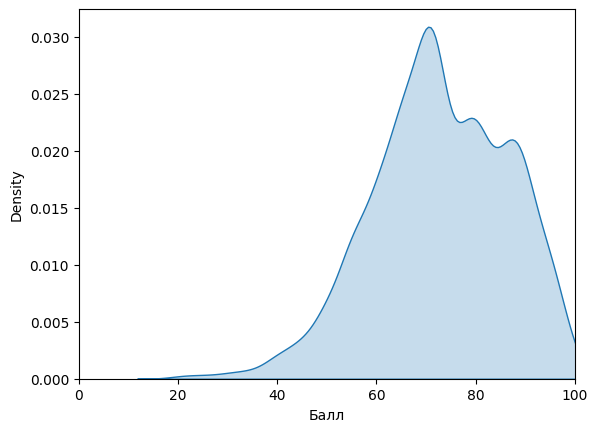

In [235]:
sns.kdeplot(data=data, x="Балл",fill=True)
plt.xlim(0, 100)

In [236]:
data_len = len(data)

unstatis_index = 0
satis_index = data.loc[data["Балл"] == 24].index[0]
good_index = data.loc[data["Балл"] == 50].index[0]
exellent_index = data.loc[data["Балл"] == 76].index[0]

excellent = (data_len - exellent_index) / data_len * 100
good = (exellent_index - good_index) / data_len * 100
satisfactory = (good_index - satis_index) / data_len * 100
unsatisfactory = (satis_index - unstatis_index) / data_len * 100

print(f"Неудовлетворительно: {unsatisfactory:.2f}%")
print(f"Удовлетворительно: {satisfactory:.2f}%")
print(f"Хорошо: {good:.2f}%")
print(f"Отлично: {excellent:.2f}%")

Неудовлетворительно: 0.13%
Удовлетворительно: 4.66%
Хорошо: 51.08%
Отлично: 44.13%


In [237]:
# gpt solution
# Категоризация по баллам
bins = [0, 24, 50, 76, 101]
labels = ["неудовлетворительно", "удовлетворительно", "хорошо", "отлично"]

data["Оценка"] = pd.cut(data["Балл"], bins=bins, labels=labels, right=False)

# Подсчет процентов
percentages = data["Оценка"].value_counts(normalize=True) * 100

print(percentages.round(2))

хорошо                 51.08
отлично                44.13
удовлетворительно       4.66
неудовлетворительно     0.13
Name: Оценка, dtype: float64


In [238]:
sex = data["Пол"].value_counts(normalize=True) * 100
print(sex.round(2))

Ж    57.97
М    42.03
Name: Пол, dtype: float64


In [239]:
len(data["№ школы"].value_counts())

24

In [240]:
data.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Первичный балл,Балл,Минимальный балл,Оценка
0,1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),8.0,20.0,24.0,неудовлетворительно
1,2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),8.0,20.0,24.0,неудовлетворительно
2,3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),9.0,22.0,24.0,неудовлетворительно
3,4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),9.0,22.0,24.0,неудовлетворительно
4,5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),10.0,24.0,24.0,удовлетворительно


### Количество заданий с кратким ответом

In [241]:
number_of_b_type_ex = len(data["Задания с кратким ответом"].iloc[0])
print(number_of_b_type_ex)

25


In [ ]:
# Функция для преобразования ответа в численный формат
def parse_short_answer_ex(answer: str) -> str:
    result = ""
    for c in answer:
        if c == "+":
            result += "1"
        elif c == "-":
            result += "0"
        else:
            result += c
    return result

vectorized_SAParser = np.vectorize(parse_short_answer_ex)
data["parsed_short_answer_ex"] = data["Задания с кратким ответом"].apply(vectorized_SAParser)
data.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Первичный балл,Балл,Минимальный балл,Оценка,parsed_short_answer_ex
0,1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),8.0,20.0,24.0,неудовлетворительно,1111001101100000000000000
1,2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),8.0,20.0,24.0,неудовлетворительно,1100010001000100000110100
2,3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),9.0,22.0,24.0,неудовлетворительно,2000000001000010000000001
3,4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),9.0,22.0,24.0,неудовлетворительно,1100100110000020000110000
4,5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),10.0,24.0,24.0,удовлетворительно,1110000011100010000100002


In [ ]:
# Функция для преобразования ответа в численный формат
def parse_long_answer_ex(answer: str) -> str:
    answer = str(answer)
    return re.sub(r'\(\d+\)', '', answer)

vectorized_LAParser = np.vectorize(parse_long_answer_ex)
data["parsed_long_answer_ex"] = data["Задания с развёрнутым ответом"].apply(vectorized_LAParser)
data

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Первичный балл,Балл,Минимальный балл,Оценка,parsed_short_answer_ex,parsed_long_answer_ex
0,1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),8.0,20.0,24.0,неудовлетворительно,1111001101100000000000000,000000000000
1,2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),8.0,20.0,24.0,неудовлетворительно,1100010001000100000110100,000000000000
2,3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),9.0,22.0,24.0,неудовлетворительно,2000000001000010000000001,000000010111
3,4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),9.0,22.0,24.0,неудовлетворительно,1100100110000020000110000,000000000000
4,5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),10.0,24.0,24.0,удовлетворительно,1110000011100010000100002,000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,3044.0,146.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),58.0,100.0,24.0,отлично,2111115111111121111111114,131322332211
3044,3045.0,147.0,11,Ж,340.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),58.0,100.0,24.0,отлично,2111115111111121111111114,131322332211
3045,3046.0,147.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),58.0,100.0,24.0,отлично,2111115111111121111111114,131322332211
3046,3047.0,147.0,11,Ж,337.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),58.0,100.0,24.0,отлично,2111115111111121111111114,131322332211


### Количество заданий с развернутым ответом

In [244]:
number_of_c_type_ex = len(data["parsed_long_answer_ex"].iloc[0])
print(number_of_c_type_ex)

12


In [ ]:
# Функция подсчета баллов для заданий
def score_count(data: pd.Series, perfect_solution: str) -> pd.DataFrame:
    keys = range(1, len(perfect_solution) + 1)
    total_score_dict = {key:0 for key in keys}
    for answer in data.values:
        for key, value in zip(keys, answer):
            total_score_dict[key] += int(value)

    perfect_score_dict = {}
    for key, value in zip(keys, perfect_solution):
            perfect_score_dict[key] = int(value) * len(data)

    percent_dict = {key: round((obs_score / perfect_score) * 100, 2) 
                    for obs_score, perfect_score, key in zip(total_score_dict.values(), perfect_score_dict.values(), keys)}

    result_df = pd.DataFrame.from_dict({
        "Количество решенных заданий": total_score_dict,
        "Максимальное количество баллов": perfect_score_dict,
        "Процент решенных заданий": percent_dict
    }, orient='index')

    return result_df

### Процент выполненных и невыполненных заданий типа В

In [246]:
percent_b_type_df = score_count(data["parsed_short_answer_ex"], "2111115111111121111111114")
percent_b_type_df.head()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
Количество решенных заданий,5498.00,2831.00,2662.00,2356.0,1797.00,2762.00,11672.00,2304.00,2564.00,2953.00,...,2102.00,2049.00,2261.00,2114.00,2522.00,2190.00,1465.00,2333.00,755.00,9965.00
Максимальное количество баллов,6096.00,3048.00,3048.00,3048.0,3048.00,3048.00,15240.00,3048.00,3048.00,3048.00,...,3048.00,3048.00,3048.00,3048.00,3048.00,3048.00,3048.00,3048.00,3048.00,12192.00
Процент решенных заданий,90.19,92.88,87.34,77.3,58.96,90.62,76.59,75.59,84.12,96.88,...,68.96,67.22,74.18,69.36,82.74,71.85,48.06,76.54,24.77,81.73


### Процент выполненных и невыполненных заданий типа С

In [247]:
percent_c_type_df = score_count(data["parsed_long_answer_ex"], "131322332211")
percent_c_type_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12
Количество решенных заданий,2949.00,6823.00,2879.00,7288.0,4991.00,3753.00,6509.00,5069.00,3543.00,3170.0,2987.0,2577.00
Максимальное количество баллов,3048.00,9144.00,3048.00,9144.0,6096.00,6096.00,9144.00,9144.00,6096.00,6096.0,3048.0,3048.00
Процент решенных заданий,96.75,74.62,94.46,79.7,81.87,61.56,71.18,55.44,58.12,52.0,98.0,84.55
